In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### Data collection

In [33]:
warnings.filterwarnings('ignore')

In [8]:
df_x = pd.read_csv('Diabetes_XTrain.csv')

In [12]:
df_x.shape

(576, 8)

In [9]:
df_x.head(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [10]:
df_y = pd.read_csv('Diabetes_YTrain.csv')

In [13]:
df_y.shape

(576, 1)

In [45]:
df_y.tail(n = 5)

,Outcome
571,0
572,1
573,0
574,0
575,0


In [14]:
X_train = df_x.values
Y_train = df_y.values

### Exploratory Analysis

<AxesSubplot:xlabel='Outcome', ylabel='count'>

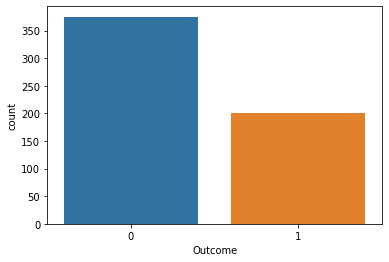

In [20]:
sns.countplot(x = 'Outcome', data = df_y)           # count diabetic and non-diabetic users in the dataset

### KNN


In [34]:
def Dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X, Y, query, k = 5):
    
    vals = []
    n = X.shape[0]
    
    for i in range(n):
        d = Dist(X[i], query)
        vals.append((d, Y[i]))
        
    vals = sorted(vals)
    vals = vals[:k]
    
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:, 1], return_counts = True)
    idx = new_vals[1].argmax()
    
    return new_vals[0][idx]


In [49]:
predict = knn(X_train, Y_train, X_train[571])
print(predict)

[0]


### Load Testing Data

In [37]:
df_test = pd.read_csv('Diabetes_Xtest.csv')

In [39]:
df_test.head(n = 5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,0,28.7,0.092,25
3,13,76,60,0,0,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22


In [42]:
X_test = df_test.values
print(X_test.shape)

(192, 8)


In [52]:
ans = []

n = X_test.shape[0]

for i in range(n):
    predict = knn(X_train, Y_train, X_test[i])
    ans.append(int(predict))
    
print(ans)
print(len(ans))

[1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0]
192
